In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [40]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [41]:
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [42]:
df["average_score"] = (
    df["math score"] + df["reading score"] + df["writing score"]
) / 3
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


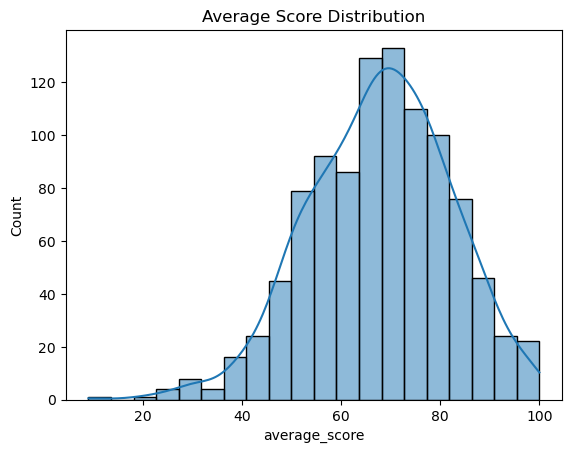

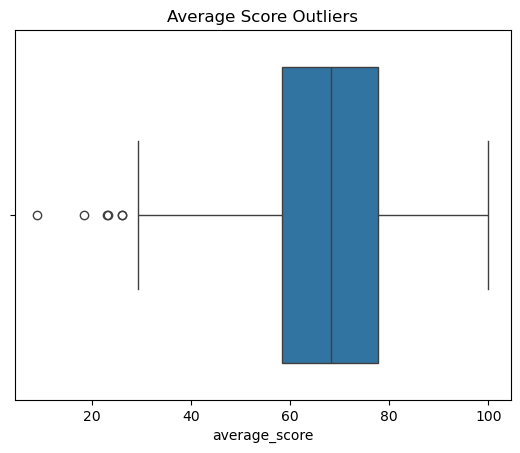

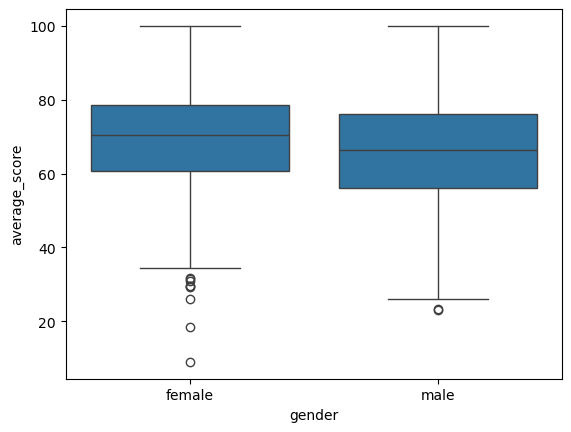

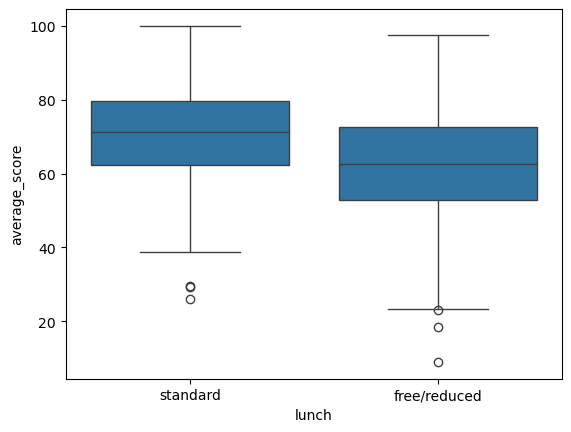

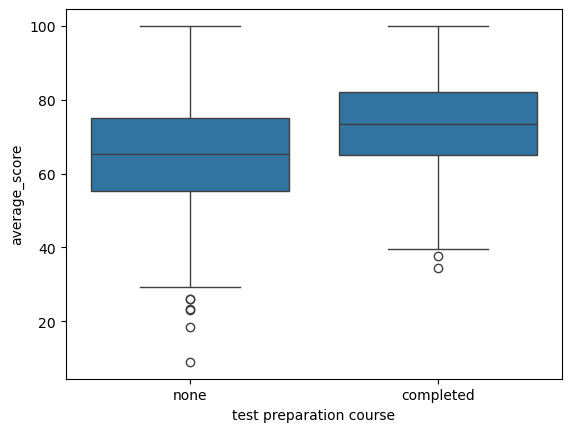

In [27]:
# Distribution
plt.figure()
sns.histplot(df["average_score"], bins=20, kde=True)
plt.title("Average Score Distribution")
plt.show()

# Boxplot
plt.figure()
sns.boxplot(x=df["average_score"])
plt.title("Average Score Outliers")
plt.show()

# Gender vs score
plt.figure()
sns.boxplot(x="gender", y="average_score", data=df)
plt.show()

# Lunch vs score
plt.figure()
sns.boxplot(x="lunch", y="average_score", data=df)
plt.show()

# Test prep vs score
plt.figure()
sns.boxplot(x="test preparation course", y="average_score", data=df)
plt.show()


In [43]:
df_model = pd.get_dummies(df.drop(["math score", "reading score", "writing score", "average_score"], axis=1), drop_first=True)
df_model.head()


,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,False,True,False,False,False,True,False,False,False,False,True,True
1,False,False,True,False,False,False,False,False,True,False,True,False
2,False,True,False,False,False,False,False,True,False,False,True,True
3,True,False,False,False,False,False,False,False,False,False,False,True
4,True,False,True,False,False,False,False,False,True,False,True,True


In [44]:
from sklearn.model_selection import train_test_split

X = df_model  # all encoded features
y = df[["math score", "reading score", "writing score"]]  # multi-target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save features for Streamlit
import pickle
features = X_train.columns.tolist()
pickle.dump(features, open("features.pkl", "wb"))


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

base_model = LinearRegression()
model = MultiOutputRegressor(base_model)
model.fit(X_train_scaled, y_train)


MultiOutputRegressor(estimator=LinearRegression())

In [47]:
from sklearn.metrics import mean_absolute_error, r2_score

preds = model.predict(X_test_scaled)
print("MAE per target:", mean_absolute_error(y_test, preds, multioutput='raw_values'))
print("R2 per target:", r2_score(y_test, preds, multioutput='raw_values'))


MAE per target: [11.26987278 10.83028796 10.19314295]
R2 per target: [0.17599998 0.15939618 0.26373588]


In [48]:
pickle.dump(model, open("model_multi.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
